# [Adaptation](https://www.youtube.com/watch?v=bNbN9yoEOdU)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter
from matplotlib import cm

In [3]:
def func(x):
    return np.sin(x) * 3

In [4]:
def func2(x):
    return np.cos(x) * 3

In [5]:
# https://stackoverflow.com/a/68239889
metadata = dict(title="Movie", artist="Animation")
writer = FFMpegWriter(fps=60, metadata=metadata)

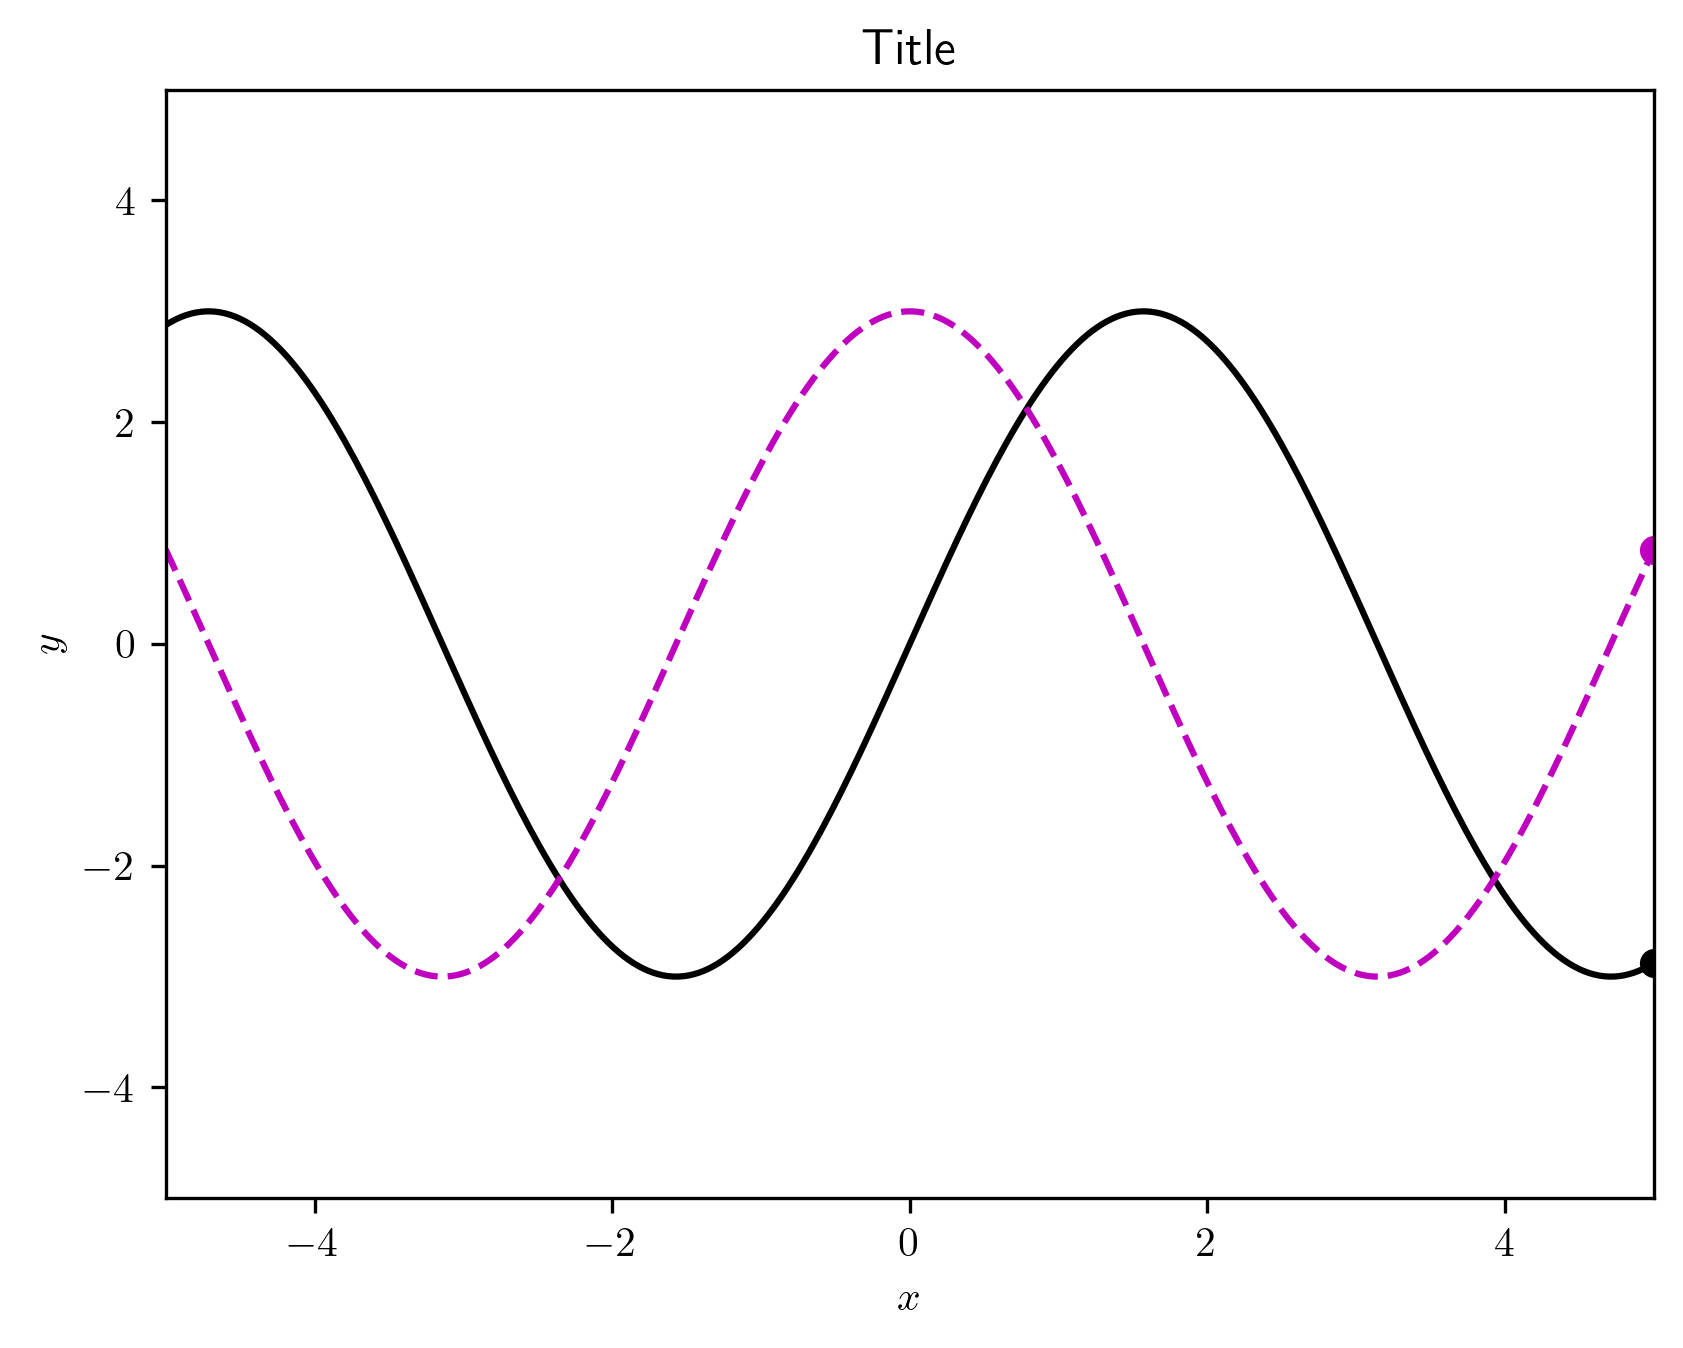

In [6]:
fig = plt.figure()
(l,) = plt.plot([], [], "k-")
(l2,) = plt.plot([], [], "m--")
(p1,) = plt.plot([], [], "ko")
(p2,) = plt.plot([], [], "mo")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Title")

plt.xlim(-5, 5)
plt.ylim(-5, 5)


xlist = []
xlist2 = []
ylist = []
ylist2 = []

with writer.saving(fig=fig, outfile="sinWave2.mp4", dpi=300):
    # Plot the first line and cursor
    for xval in np.linspace(-5, 5, 300):
        xlist.append(xval)
        ylist.append(func(xval))

        l.set_data(xlist, ylist)
        l2.set_data(xlist2, ylist2)

        p1.set_data([xval], [func(xval)])

        writer.grab_frame()

    # plot the second line and cursor
    for xval in np.linspace(-5, 5, 300):
        xlist2.append(xval)
        ylist2.append(func2(xval))

        l.set_data(xlist, ylist)
        l2.set_data(xlist2, ylist2)

        p2.set_data([xval], [func2(xval)])

        writer.grab_frame()

In [7]:
# Generate some random linear data to fit:
def func(x):
    return x * 1.2 + 0.1 + np.random.normal(0, 2, x.shape)

In [8]:
metadata = dict(title="Movie", artist="Animation")
writer = FFMpegWriter(fps=60, metadata=metadata)

In [9]:
np.random.seed(102434201)

In [12]:
x = np.random.uniform(-7, 7, 10)
x = np.sort(x)  # Sort the x values here so we get a nice left to right progression in the animation
y = func(x)

coeff = np.polyfit(x, y, 1)
print(coeff)

[0.83980525 1.2713752 ]


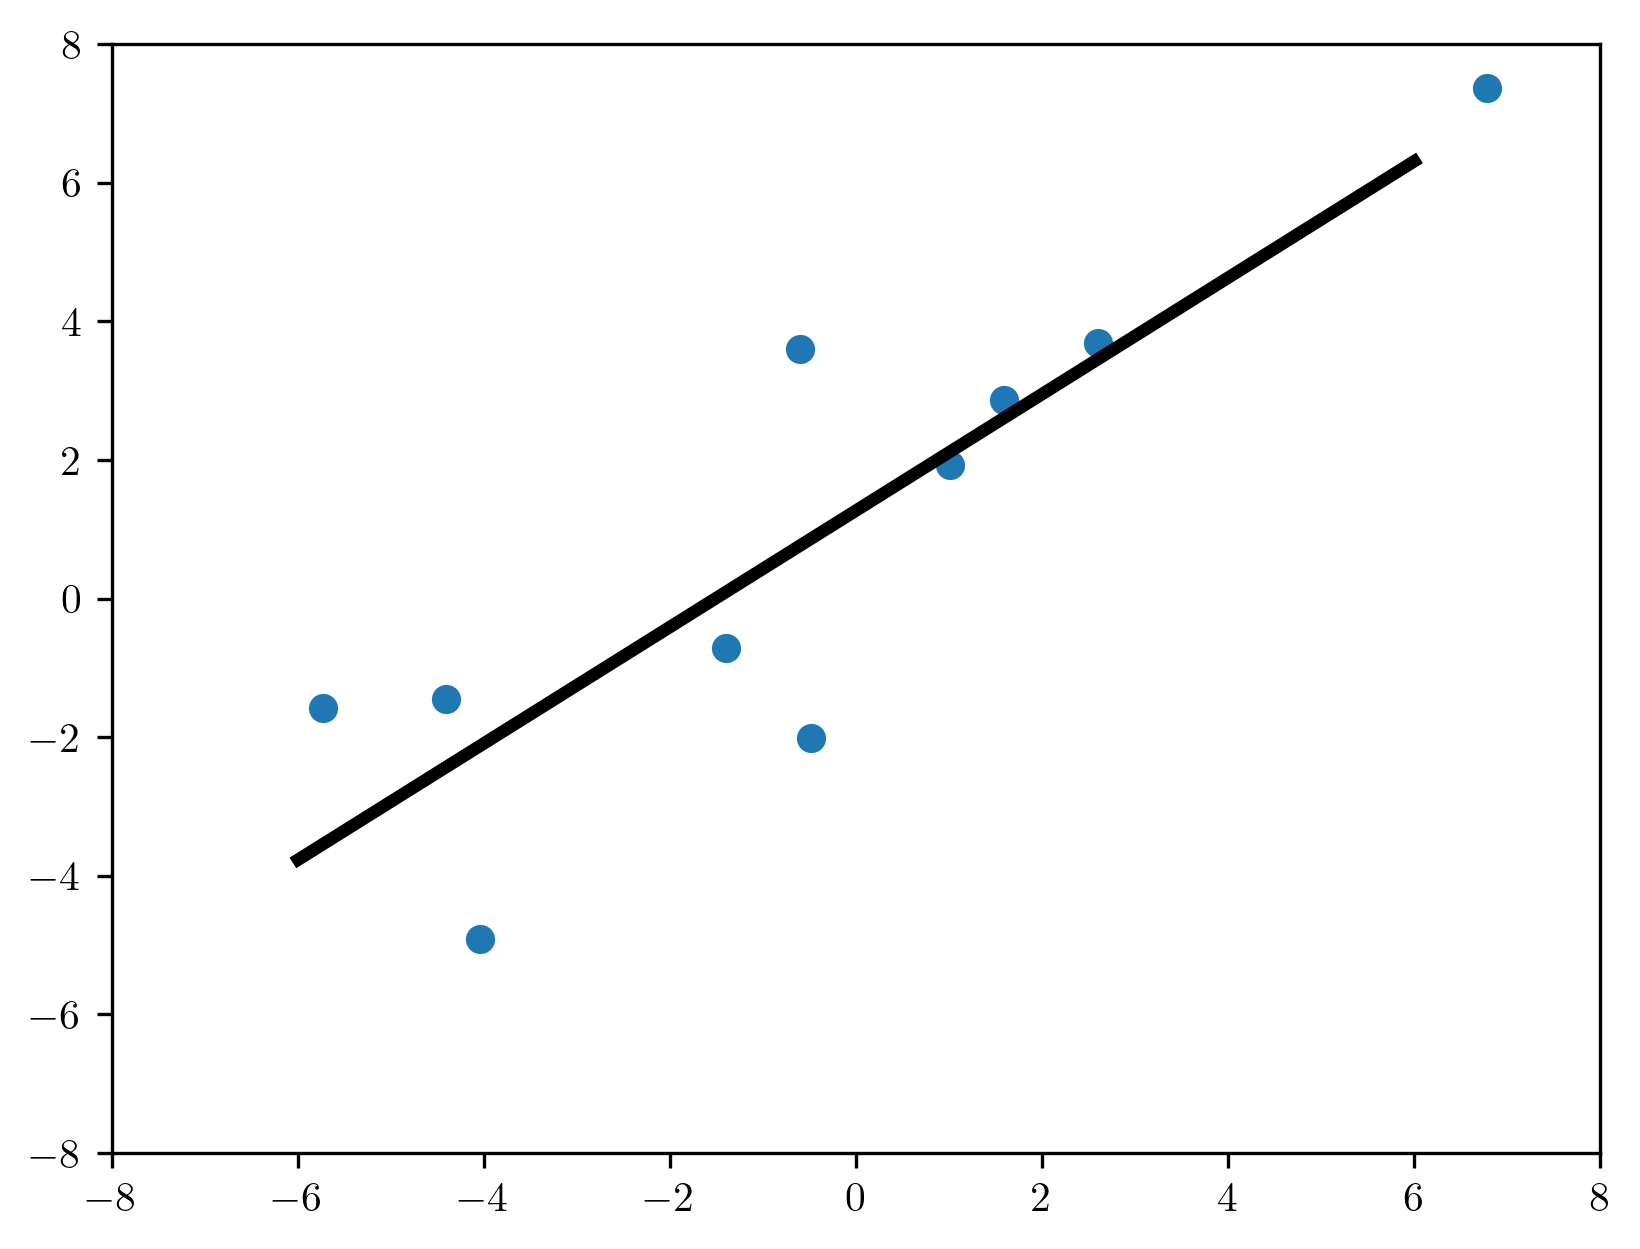

In [13]:
fig = plt.figure()
plt.xlim(-8, 8)
plt.ylim(-8, 8)

xline = np.linspace(-6, 6, 40)  # This controls how long the animation takes below.
yline = np.polyval(coeff, xline)

(lPnt,) = plt.plot(x, y, "o")
(l,) = plt.plot(xline, yline, "k-", linewidth=3)

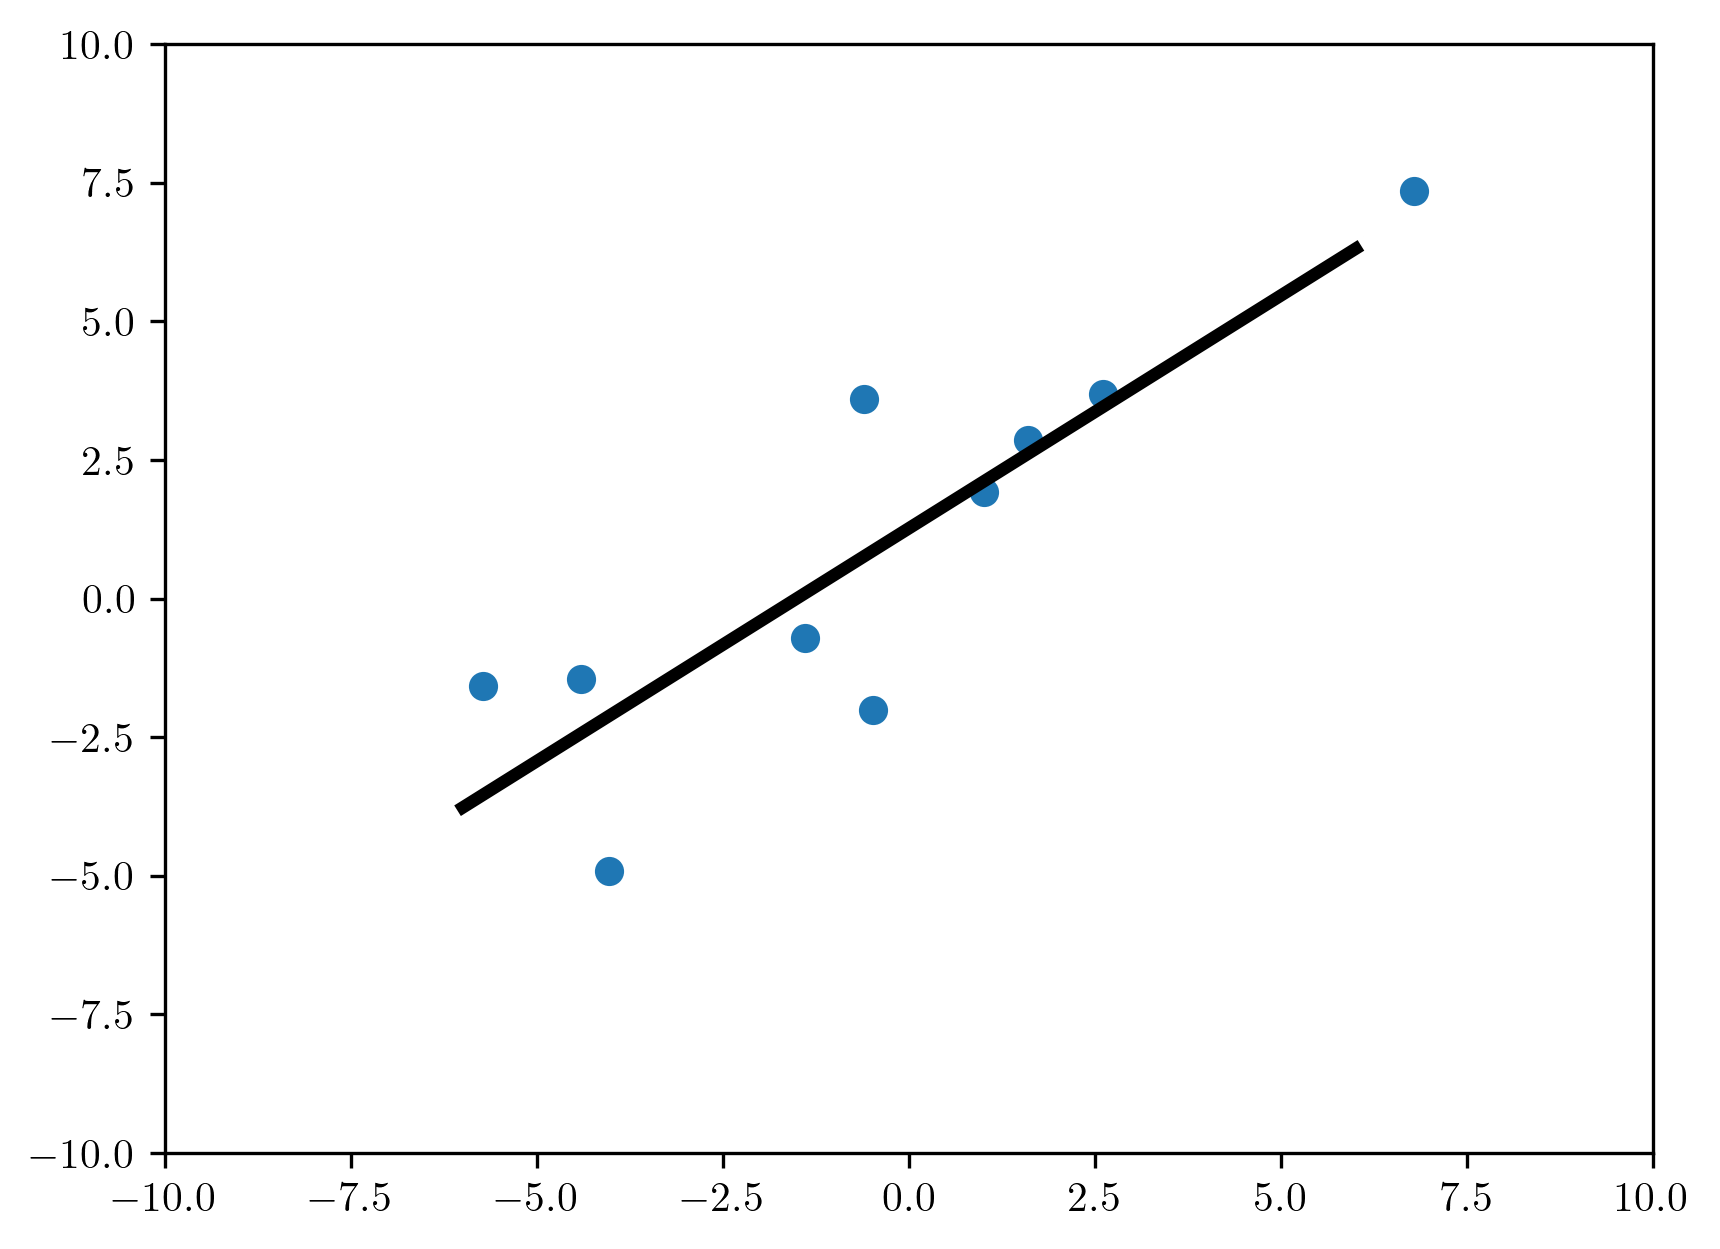

In [14]:
fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

(lPnt,) = plt.plot([], [], "o")
(l,) = plt.plot([], [], "k-", linewidth=3)

xLineList = []
yLineList = []

xPntList = []
yPntList = []

# We generate each plot sequentially here
with writer.saving(fig=fig, outfile="fitPlot.mp4", dpi=300):
    # First show the data points
    for xval, yval in zip(x, y):
        xPntList.append(xval)
        yPntList.append(yval)

        lPnt.set_data(xPntList, yPntList)
        l.set_data(xLineList, yLineList)

        # Double up the frames to slow things down a bit here.
        writer.grab_frame()
        writer.grab_frame()

    # Add the line fit
    for xval, yval in zip(xline, yline):
        xLineList.append(xval)
        yLineList.append(yval)

        lPnt.set_data(xPntList, yPntList)
        l.set_data(xLineList, yLineList)

        writer.grab_frame()

    # We pad at the end to create some "pauseing space"
    for ii in range(30):
        writer.grab_frame()

In [25]:
np.random.seed(19680801)

In [26]:
metadata = dict(title="Movie", artist="Animation")
writer = FFMpegWriter(fps=60, metadata=metadata)

In [27]:
def func(x, y, r, t):
    return np.cos(r / 2 + t) * np.exp(-np.square(r) / 50)

In [28]:
xvec = np.linspace(-10, 10, 2000)
yvec = np.linspace(-10, 10, 2000)

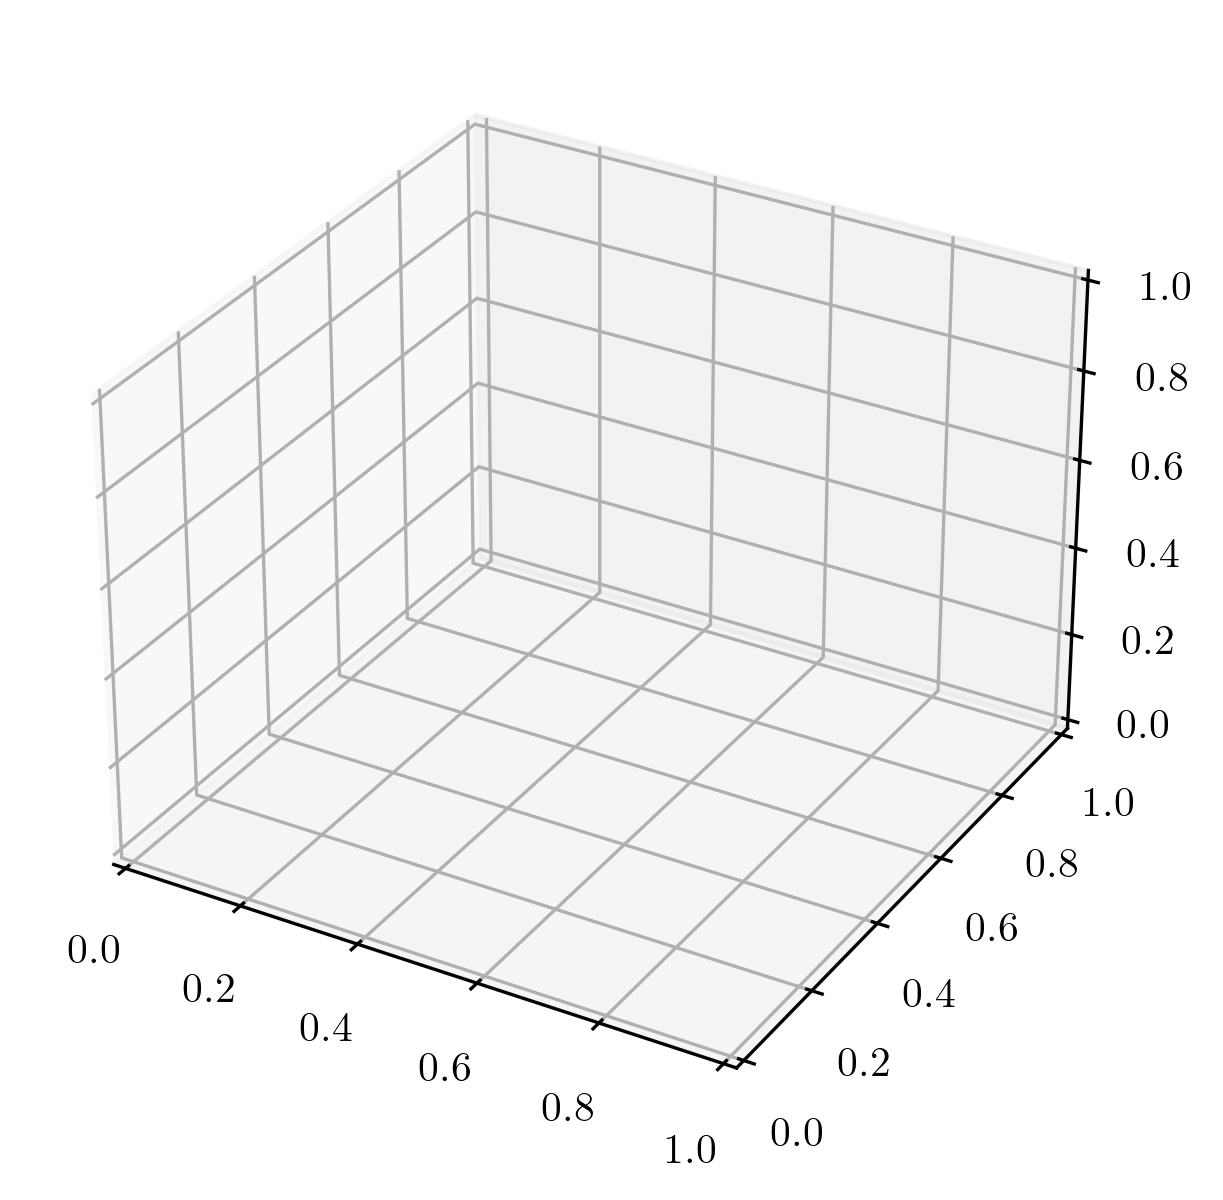

In [29]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

plt.xlim(-5, 5)
plt.ylim(-5, 5)

xlist, ylist = np.meshgrid(xvec, yvec)
rlist = np.sqrt(np.square(xlist) + np.square(ylist))

with writer.saving(fig=fig, outfile="exp3d.mp4", dpi=300):
    for tval in np.linspace(0, 20, 480):
        # print(tval)
        zval = func(xlist, ylist, rlist, tval)
        ax.set_zlim(-1, 1)
        ax.plot_surface(xlist, ylist, zval, cmap=cm.viridis)

        writer.grab_frame()
        plt.cla()

In [24]:
!(ls *.mp4)

exp3d.mp4  fitPlot.mp4	sinWave2.mp4
